
   [Ссылка на презентацию на яндекс диске](https://disk.yandex.ru/i/IX1r0asi74izVQ )


### Описание и постановка задачи

В этом проекте нам предстоит поработать с данными интернет-магазина товаров для дома «Пока все ещё тут». Основной **целью** этого проекта является выявление профилей потребления

<p>Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».</p>
<p>Колонки в /datasets/ecom_dataset_upd.csv:</p>
<ul>
  <li><strong>date</strong> — дата заказа;</li>
  <li><strong>customer_id</strong> — идентификатор покупателя;</li>
  <li><strong>order_id</strong> — идентификатор заказа;</li>
  <li><strong>product</strong> — наименование товара;</li>
  <li><strong>quantity</strong> — количество товара в заказе;</li>
  <li><strong>price</strong> — цена товара.</li>
</ul>


Для выполнения проекта и достижения цели нам необходимо выполнить следующие шаги

1. Знакомство с данными и преобразование

- загрузка данных из файла
- проверим правильность названия колонок, переименуем если требуется
- посмотрим тип данных в колонках, изменим тип данных где требуется
- посмотрим пропуски и пустые значения
- посмотрим явные дубликаты, удалим при необходимости

2. Исследовательский анализ

2.1 Дать характеристику самому среднему покупателю, чтобы выяснить целевую аудиторию: 
- гистограммы распределения средней суммы одного заказа,
- гистограммы распределения количество покупок на одного покупателя.
- гистограмма количества позиций в одной покупке


На этом этапе также происходит поиск аномалий, которые по необходимости можно отфильтровать

2.2 Анализ сезонности: график средней суммы, среднего количества товаров на покупателя по дате. Есть ли месяца в которые покупают больше товаров или на большие суммые?

2.3. Анализ выручки магазина: подсчет выручки по месяцам, построение графика зависимости выручки от месяца.

3. Анализ RFM. Он учитывает три признака: recency (давность покупки), frequency (частота покупок) и monetary (сумма трат клиента). Здесь планируется сгрупировать данные по пользователям, и присвоить каждому пользователю "баллы", в зависимоти от частоты покупок, среднего чека этого покупателя и давности совершения покупки. Это позволит выделить категории пользователей, которые уже лояльны, и их можно поощрять, и наоборот, найти категории "отстающих", которых можно простимулировать на покупки. 

- групировка по пользовалям
- вычисление recency (давность покупки) в отдельном столбце, в днях от последнй даты. Создание столбца с категорией (1 - недавно, 2 - средне, 3 - давно)
- вычисление frequency (частота покупок), или сколько раз каждый пользователь совершил покупки в вашем периоде анализа. На основании этих данных создание нового столбца с балами, по аналогии с recency 
- вычисление monetary (сумма трат клиента), или общую сумму трат каждого пользователя за весь период. Подсчет балов по аналогии с предыдущими столбцами
- непосредственно сегментация клиентов. Напрмиер, 111: это сливки (чемпионы) вашей клиентской базы. Покупают часто, на большие суммы и последняя покупка была недавно. В свою оччередь 333 — самый неактивный сегмент. Сюда попадают клиенты, которые однажды что-то купили и больше не возвращались. Всего 27 сегментов.

4 Анализ категорий товара. Здесь планируется разделить пользователей на категории, например "кухня", "сад и огород". Затем проанализировать какие категории продаются лучше, какие приносят больше прибыли и тд.

- категоризация по группам товаров 
- распределение среднего чека по сегментам
- распределение частоты покупок по сегментам
- сезонность по группам товаров

5 Проверка гипотез:

5.1 Сравнение выручки, которую приносят пользователи в соответствии с категорией присвоенной в ходе анализа RFM. Есть ли статистически значимая разница в выручке от разных категорий?

5.2 Сравнение выручки от продажи категорией товара. Есть ли категории которые приносят больше выручки чем остальные?

###  Знакомство с данными и преобразование

In [1]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# загрузка данных из файла
import os

path = '/datasets/ecom_dataset_upd.csv'

if os.path.exists(path):
    ecom = pd.read_csv(path)
    print('Файл загружен')
else:
    print('Не удалось загрузить файл')

Файл загружен


In [3]:
display(ecom.head(10))

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [4]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


DataFrame состоит из 7474 записей.
Всего в DataFrame 6 колонок. Названия колонок правильные, переименовывать не будем. Однако, есть несоответствие в типах данных: колонка date должна содержать данные в формате даты, но здесь она представлена как int64. Нам потребуется преобразовать эту колонку в формат даты.

In [5]:
# Преобразуем колонку 'date' из целочисленного типа в datetime
ecom['date'] = pd.to_datetime(ecom['date'], format='%Y%m%d%H')

In [6]:
display(ecom.head(10))

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


Теперь время заказа выглядит нормально.

In [7]:
# Находим самую раннюю дату (начало периода)
start_date = ecom['date'].min()

# Находим самую позднюю дату (конец периода)
end_date = ecom['date'].max()

# Выводим результаты
print(f"Начальная дата датасета: {start_date.strftime('%Y-%m-%d')}")
print(f"Конечная дата датасета: {end_date.strftime('%Y-%m-%d')}")


Начальная дата датасета: 2018-10-01
Конечная дата датасета: 2020-01-31


 Данные в вашем датасете охватывают период с 1 октября 2018 года по 31 января 2020 года, тоесть за 1,5 года или 16 месяцев.

In [8]:
# Вычисляем количество дней
number_of_days = (end_date - start_date).days + 1  # +1 потому что обе даты включены

print(f"Количество дней в данных: {number_of_days}")

Количество дней в данных: 488


Проверим уникальные значения в каждом столбце

In [9]:
# Подсчет и вывод уникальных значений для каждого столбца
for column in ecom.columns:
    unique_count = ecom[column].nunique()
    print(f"Количество уникальных значений в столбце {column}: {unique_count}")

Количество уникальных значений в столбце date: 3126
Количество уникальных значений в столбце customer_id: 2451
Количество уникальных значений в столбце order_id: 3521
Количество уникальных значений в столбце product: 2343
Количество уникальных значений в столбце quantity: 49
Количество уникальных значений в столбце price: 407


У нас 2451 клиент за этот период,  3521 заказов, что больше, чем количество уникальных клиентов, значит клиенты могли совершать несколько заказов, за исследуемый период. Было бы полезно узнать сколько заказов в день в обороте магазина.

In [10]:
# Теперь подсчитаем общее количество заказов
total_orders = ecom['order_id'].nunique()

# Вычислим среднее количество заказов в день
average_orders_per_day = total_orders / number_of_days

print(f"Среднее количество заказов в день: {average_orders_per_day:.2f}")

Среднее количество заказов в день: 7.22


В среднем чуть больше 7 заказов в день. 

In [11]:
# Проверяем количество пропущенных значений в каждом столбце
missing_values = ecom.isnull().sum()

# Выводим количество пропущенных значений для каждого столбца
for column, missing in missing_values.iteritems():
    print(f"В столбце {column} пропущено {missing} значений")


В столбце date пропущено 0 значений
В столбце customer_id пропущено 0 значений
В столбце order_id пропущено 0 значений
В столбце product пропущено 0 значений
В столбце quantity пропущено 0 значений
В столбце price пропущено 0 значений


Пустых значений по счастью нет.

In [12]:
# Находим и считаем дубликаты
duplicates = ecom.duplicated().sum()

print(f"В датафрейме найдено {duplicates} полных дубликатов строк.")


В датафрейме найдено 0 полных дубликатов строк.


Полных дубликатов (повторы значений во всех столбцах) отсутствуют. В остальных столбцах по отдельности наличие дубликатов естественно, поскольку могут быть заказы в один день (повторы в столбце date), может быть несколько заказов от одного клиента (повторы customer_id).

Данные приведены в нужный тип, проверены на дубликаты и пустые значения, а также ознакомились с количеством уникальных значений в столбцах. Далее более детально ознакомимся с содержанием данных.

Выполним проверку на наличие дубликатов в наборе, где одинаковые комбинации значений столбцов customer_id, order_id, и product

In [13]:
#  сколько точных дубликатов по трем указанным полям
ecom[['customer_id', 'order_id', 'product']].duplicated().sum()

1886

У нас 1886 строк повторяющихся по номеру заказа, идентификатору клиента и названию продукта, посмотрим на даты

In [14]:
# Отображение всех дубликатов (включая оригинальные строки)
duplicates = ecom[ecom.duplicated(subset=['customer_id', 'order_id', 'product'], keep=False)]

# Сортировка значений, чтобы дубликаты шли подряд 
duplicates_sorted = duplicates.sort_values(by=['customer_id', 'order_id', 'product'])

In [15]:
# Вывод дубликатов
display(duplicates_sorted.head())

,date,customer_id,order_id,product,quantity,price
2237,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Margaretha укорененный ч...,1,135.0
2241,2019-03-07 11:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Margaretha укорененный ч...,1,135.0
2238,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Mary укорененный черенок,1,135.0
2242,2019-03-07 11:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Mary укорененный черенок,1,135.0
2239,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Prins Nikolai укорененны...,1,135.0


Некоторые заказы дублируются по датам, но некоторые имеют несколько дат. Возможно это уточненные заказы. Удалим эти строки оставив только последнюю по дате.

In [16]:
# Сортировка данных по дате в порядке убывания
ecom = ecom.sort_values(by='date', ascending=False)

In [17]:
# Подсчет количества строк до удаления дубликатов
rows_before = ecom.shape[0]

In [18]:
# Удаление дубликатов, сохраняя последний (т.е. самый новый по дате)
ecom = ecom.drop_duplicates(subset=['customer_id', 'order_id', 'product'])

In [19]:
# Подсчет количества строк после удаления дубликатов
rows_after = ecom.shape[0]

# Расчет процента потерянных строк
rows_lost_percent = ((rows_before - rows_after) / rows_before) * 100

# Вывод результатов
print(f'Количество строк до удаления дубликатов: {rows_before}')
print(f'Количество строк после удаления дубликатов: {rows_after}')
print(f'Процент потерянных строк: {rows_lost_percent:.2f}%')

Количество строк до удаления дубликатов: 7474
Количество строк после удаления дубликатов: 5588
Процент потерянных строк: 25.23%


Итого мы оставили последний заказ, и удалив дубликаты потеряли четверть данных. Повторим проверку чтобы убедиться, что все сработала как ожидалось

In [20]:
#  сколько точных дубликатов по трем указанным полям
ecom[['customer_id', 'order_id', 'product']].duplicated().sum()

0

Неявных дубликатов по этим позициям больше нет

Теперь посмотрим нет ли у нас заказов, у которых номер одинаковый, а идентификатор клиента разный (один клиент один заказ)

In [21]:
# Группируем данные по идентификатору заказа и считаем количество уникальных клиентов для каждого заказа
order_customer_count = ecom.groupby('order_id')['customer_id'].nunique().reset_index()

# Поиск заказов, которые соответствуют более чем одному клиенту
multiple_customers_per_order = order_customer_count[order_customer_count['customer_id'] > 1]

In [22]:
multiple_customers_per_order

,order_id,customer_id
248,14872,2
516,68785,2
797,69283,2
817,69310,2
832,69345,2
862,69410,2
902,69485,3
933,69531,2
1066,69833,2
1200,70114,2


In [23]:
print(f"Количество заказов, соответствующих более чем одному клиенту: {multiple_customers_per_order.shape[0]}")


Количество заказов, соответствующих более чем одному клиенту: 29


Их не много, всего 29 штук, удалим полностью, поскольку какой из клиентов настоящий мы не знаем, оригинал заказа тоже не сохранится.

In [24]:
# Находим айди заказов с более чем одним клиентом
duplicate_orders = ecom.groupby('order_id').filter(lambda x: x['customer_id'].nunique() > 1)

In [25]:
duplicate_orders

,date,customer_id,order_id,product,quantity,price
6606,2019-10-14 09:00:00,2f1671cc-47eb-49bb-a40b-808375f4218b,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0
6601,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0
6576,2019-10-10 22:00:00,31a39955-8a93-42f3-8839-04a9693632a7,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.0
6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
...,...,...,...,...,...,...
1196,2018-12-13 19:00:00,70d60304-4b3c-4f34-9430-1872ec6e6309,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0
1160,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
1154,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
538,2018-10-30 21:00:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0


In [26]:
# Записываем количество строк до удаления
rows_before = ecom.shape[0]

# Удаляем строки, где заказ соответствует более чем одному клиенту, обращаясь по айди заказа
ecom = ecom[~ecom['order_id'].isin(duplicate_orders['order_id'])]

# Записываем количество строк после удаления и вычисляем процент потерь
rows_after = ecom.shape[0]
rows_lost_percent = ((rows_before - rows_after) / rows_before) * 100

# Вывод результатов
print(f'Количество строк до удаления заказов с несколькими клиентами: {rows_before}')
print(f'Количество строк после удаления: {rows_after}')
print(f'Процент потерянных строк: {rows_lost_percent:.2f}%')


Количество строк до удаления заказов с несколькими клиентами: 5588
Количество строк после удаления: 5522
Процент потерянных строк: 1.18%


Всего ушло 66 строк и чуть больше 1 процента данных. Убедимся что больше дубликатов по этим столбцам нет

In [27]:
# Группируем данные по идентификатору заказа и считаем количество уникальных клиентов для каждого заказа
order_customer_count = ecom.groupby('order_id')['customer_id'].nunique().reset_index()

# Поиск заказов, которые соответствуют более чем одному клиенту
multiple_customers_per_order = order_customer_count[order_customer_count['customer_id'] > 1]

print(f"Количество заказов, соответствующих более чем одному клиенту: {multiple_customers_per_order.shape[0]}")

Количество заказов, соответствующих более чем одному клиенту: 0


Неявные дубликаты удалены.

### Исследовательский анализ данных

#### Какое количество заказов приходится на одного клиента?

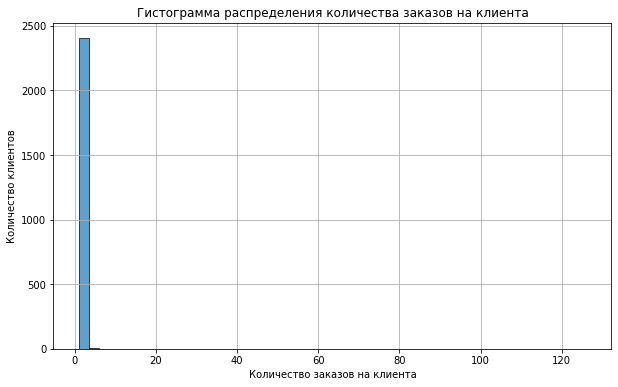

In [28]:
# Группируем данные по 'customer_id' и подсчитываем количество уникальных 'order_id' для каждого клиента
orders_per_customer = ecom.groupby('customer_id')['order_id'].nunique()

# Строим гистограмму
plt.figure(figsize=(10, 6))
orders_per_customer.hist(bins=50, alpha=0.7, edgecolor='black')

# Добавляем название и метки
plt.title('Гистограмма распределения количества заказов на клиента')
plt.xlabel('Количество заказов на клиента')
plt.ylabel('Количество клиентов')

# Показываем гистограмму
plt.show()

In [29]:
# Максимальное количество заказов на одного клиента
max_orders_per_customer = orders_per_customer.max()

# Минимальное количество заказов на одного клиента
min_orders_per_customer = orders_per_customer.min()

print(f'Максимальное количество заказов на клиента: {max_orders_per_customer}')
print(f'Минимальное количество заказов на клиента: {min_orders_per_customer}')


Максимальное количество заказов на клиента: 126
Минимальное количество заказов на клиента: 1


Кажется есть рекордсмены, которые сделали больше 100 заказов. Можно узнать сколько таких клиентов.

In [30]:
# Вычисляем 99-й перцентиль для количества заказов на клиента
percentile_99_orders_per_customer = orders_per_customer.quantile(0.99)

# Находим количество клиентов, сделавших больше заказов, чем значение 95-го перцентиля
orders_above_99_orders_per_customer = orders_per_customer[orders_per_customer > percentile_99_orders_per_customer].count()

print(f'99-й перцентиль количества заказов на клиента: {percentile_99_orders_per_customer}')
print(f'Количество клиентов с заказами выше 99-го перцентиля: {orders_above_99_orders_per_customer}')


99-й перцентиль количества заказов на клиента: 3.0
Количество клиентов с заказами выше 99-го перцентиля: 8


Это означает, что 99% клиентов сделали 1-3 заказа за исследуемый период, и только 1% клиентов сделали более трех заказов. Сохраним идентификаторы таких клиентов в переменную  anomalous_clinenes, чтобы потом удлаить.

In [31]:
# Находим идентификаторы клиентов с количеством заказов выше 95-го перцентиля
anomalous_clients = orders_per_customer[orders_per_customer > percentile_99_orders_per_customer].index.tolist()

#### Сколько в среднем позиций товара на в одной покупке?

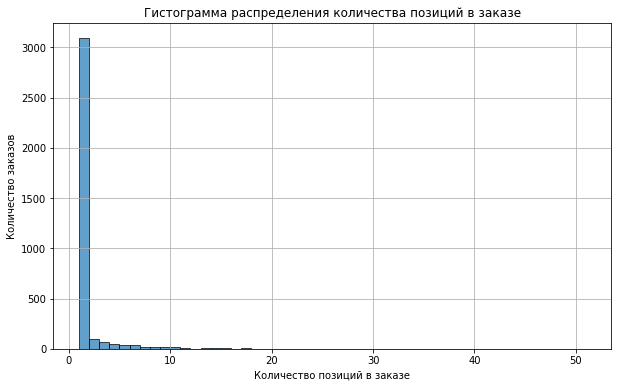

In [32]:
# Группируем данные по 'order_id' и подсчитываем количество позиций в каждом заказе
items_per_order = ecom.groupby('order_id')['product'].count()

# Строим гистограмму
plt.figure(figsize=(10, 6))
items_per_order.hist(bins=50, 
                     alpha=0.7,
                     edgecolor='black')

# Добавляем название и метки
plt.title('Гистограмма распределения количества позиций в заказе')
plt.xlabel('Количество позиций в заказе')
plt.ylabel('Количество заказов')

# Показываем гистограмму
plt.show()

Похожая картина, распределение не равномерное, смещенное из-за аномалий.

In [33]:
# Посчитаем среднее
mean_items_per_order = items_per_order.mean()

print(f'Среднее количество позиций в заказе: {mean_items_per_order:.2f}')

Среднее количество позиций в заказе: 1.58


In [34]:
# Группируем данные по 'order_id' и суммируем 'quantity' для каждого заказа
quantity_per_order = ecom.groupby('order_id')['quantity'].sum()

# Вычисляем 95-й перцентиль для общего количества товаров в заказе
percentile_95_quantity_per_order = quantity_per_order.quantile(0.95)

# Находим количество заказов, где количество товаров превышает значение 95-го перцентиля
orders_above_95 = quantity_per_order[quantity_per_order > percentile_95_quantity_per_order].count()

print(f'95-й перцентиль количества товаров в заказе: {percentile_95_quantity_per_order}')
print(f'Количество заказов с количеством товаров выше 95-го перцентиля: {orders_above_95}')


95-й перцентиль количества товаров в заказе: 15.0
Количество заказов с количеством товаров выше 95-го перцентиля: 151


В среднем в одном заказе 1,5 позиции, и в 95% случаев заказы содержат 15 или менее различных позиций товара, и лишь 5% заказов превышают этот порог. У нас всего 151 заказов содержат больше 16 позиций в заказе.

По аналогии с аномальными клиентами сохраним эти заказы в отдельный список, чтобы потом удалить.

In [35]:
# Находим заказы, где количество товаров превышает 95-й перцентиль
order_ids_above_95 = quantity_per_order[quantity_per_order > percentile_95_quantity_per_order].index.tolist()

#### Какая средняя сумма заказа?

In [36]:
# Вычисляем выручку для каждого заказа путем умножения цены на количество
ecom['revenue'] = ecom['price'] * ecom['quantity']

# Группируем данные по 'order_id' и считаем суммарную выручку для каждого заказа
order_revenue = ecom.groupby('order_id')['revenue'].sum().reset_index()

In [37]:
order_revenue

,order_id,revenue
0,12624,375.0
1,13547,684.0
2,14480,359.0
3,14481,600.0
4,14482,376.0
...,...,...
3487,112722,450.0
3488,112732,90.0
3489,112767,38.0
3490,112779,172.0


In [38]:
# Вычисляем среднюю сумму заказа
average_order_value = order_revenue['revenue'].mean()

# Выводим среднюю сумму заказа на экран
print(f'Средняя сумма заказа: {average_order_value:.2f} руб.')

Средняя сумма заказа: 1315.34 руб.


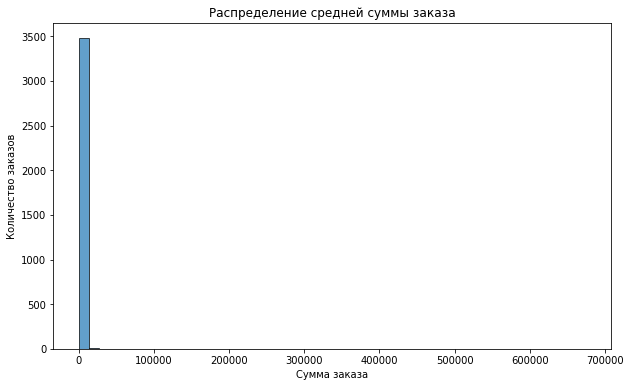

In [39]:
# Размер графика
plt.figure(figsize=(10, 6))

# Создание гистограммы
plt.hist(order_revenue['revenue'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение средней суммы заказа')

# подписи
plt.xlabel('Сумма заказа')
plt.ylabel('Количество заказов')

# отображение
plt.show()

In [40]:
# Максимальная выручка от одного заказа
max_revenue = order_revenue['revenue'].max()

# Минимальная выручка от одного заказа
min_revenue = order_revenue['revenue'].min()

print(f'Максимальная выручка от одного заказа: {max_revenue:.2f} руб.')
print(f'Минимальная выручка от одного заказа: {min_revenue:.2f} руб.')


Максимальная выручка от одного заказа: 675000.00 руб.
Минимальная выручка от одного заказа: 9.00 руб.


Стоимости заказов в диапозоне от 9 рублей до 675 тыс. рублей.

In [41]:
# Вычисляем 95-й перцентиль для выручки от заказа
percentile_95_revenue = order_revenue['revenue'].quantile(0.95)

# Выводим 95-й перцентиль на экран
print(f'95-й перцентиль выручки от заказа: {percentile_95_revenue:.2f} руб.')

# Определяем количество заказов, чья выручка превышает 95-й перцентиль
orders_above_95_revenue = order_revenue[order_revenue['revenue'] > percentile_95_revenue]

# Выводим количество таких заказов
print(f'Количество заказов с выручкой выше 95-го перцентиля: {len(orders_above_95_revenue)}')

95-й перцентиль выручки от заказа: 3776.00 руб.
Количество заказов с выручкой выше 95-го перцентиля: 174


In [42]:
# Получаем список идентификаторов заказов с выручкой выше 95-го перцентиля
orders_above_95_revenue_ids = orders_above_95_revenue['order_id'].tolist()

Объединим аномальные заказы в один список, чтобы потом удалить их.

In [43]:
# Теперь объединяем два списка: те, что с аномальным количеством товаров и те, что с аномальной суммой заказа
all_anomalous_order_ids = list(set(order_ids_above_95 + orders_above_95_revenue_ids))

In [44]:
# Общее количество аномальных заказов
total_anomalous_orders = len(all_anomalous_order_ids)

In [45]:
total_anomalous_orders

290

Получилось уникальных идентификаторв заказов 309, видимо некоторые пересекались.

##### Удаление аномалий

In [46]:
# Исходный размер датасета
original_shape = ecom.shape

In [47]:
print(f'Размер до удаления аномалий: {original_shape}')

Размер до удаления аномалий: (5522, 7)


In [48]:
# all_anomalous_order_ids содержит список айди аномальных заказов
ecom = ecom[~ecom['order_id'].isin(all_anomalous_order_ids)]

In [49]:
ecom = ecom[~ecom['customer_id'].isin(anomalous_clients)]

In [50]:
# Размер датасета после фильтрации
filtered_shape = ecom.shape

In [51]:
print(f'Размер после удаления аномалий: {filtered_shape}')

Размер после удаления аномалий: (4189, 7)


In [52]:
# Рассчитываем процент удалённых строк
removed_rows_percent = (original_shape[0] - filtered_shape[0]) / original_shape[0] * 100

print(f"Процент удалённых строк: {removed_rows_percent:.2f}%")

Процент удалённых строк: 24.14%


Многовато, но что делать, зато теперь данные свободные от аномально больших оптовых заказов на огромные суммы. Можно посмотреть как теперь выглядят распределения.

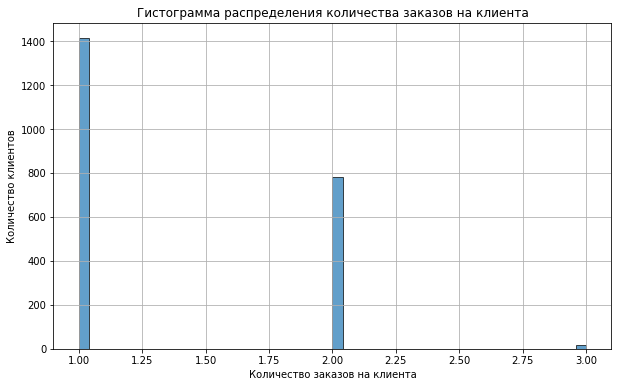

In [53]:
# Группируем данные по 'customer_id' и подсчитываем количество уникальных 'order_id' для каждого клиента
orders_per_customer = ecom.groupby('customer_id')['order_id'].nunique()

# Строим гистограмму
plt.figure(figsize=(10, 6))
orders_per_customer.hist(bins=50, alpha=0.7, edgecolor='black')

# Добавляем название и метки
plt.title('Гистограмма распределения количества заказов на клиента')
plt.xlabel('Количество заказов на клиента')
plt.ylabel('Количество клиентов')

# Показываем гистограмму
plt.show()

In [54]:
# Посчитаем среднее
mean_orders_per_customer = orders_per_customer.mean()

print(f'Среднее количество заказов на клиента: {mean_orders_per_customer:.2f}')

Среднее количество заказов на клиента: 1.37


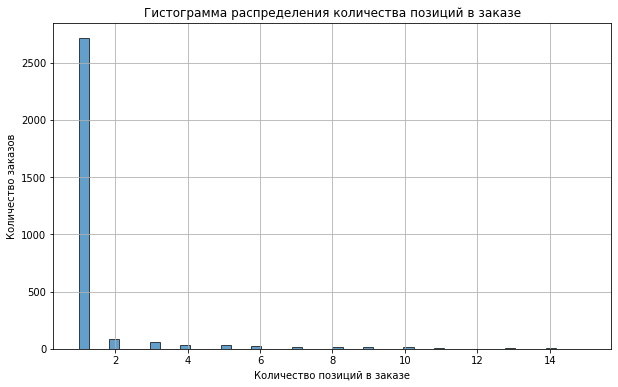

In [55]:
# Группируем данные по 'order_id' и подсчитываем количество позиций в каждом заказе
items_per_order = ecom.groupby('order_id')['product'].count()

# Строим гистограмму
plt.figure(figsize=(10, 6))
items_per_order.hist(bins=50, alpha=0.7, edgecolor='black')

# Добавляем название и метки
plt.title('Гистограмма распределения количества позиций в заказе')
plt.xlabel('Количество позиций в заказе')
plt.ylabel('Количество заказов')

# Показываем гистограмму
plt.show()

In [56]:
# Посчитаем среднее
mean_items_per_order = items_per_order.mean()

print(f'Среднее количество позиций в заказе: {mean_items_per_order:.2f}')

Среднее количество позиций в заказе: 1.39


In [57]:
# Группируем данные по 'order_id' и считаем суммарную выручку для каждого заказа
order_revenue = ecom.groupby('order_id')['revenue'].sum().reset_index()

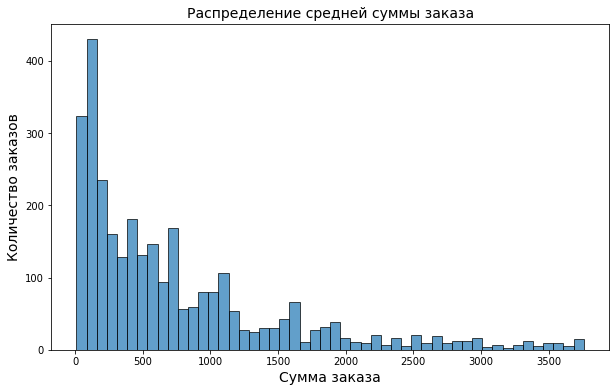

In [58]:
# Создаем гистограмму средней суммы заказа

# Размер графика
plt.figure(figsize=(10, 6))

# Создание гистограммы
plt.hist(order_revenue['revenue'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение средней суммы заказа', fontsize=14)

# подписи
plt.xlabel('Сумма заказа',fontsize=14)
plt.ylabel('Количество заказов',fontsize=14)

# отображение
plt.show()


In [59]:
# Вычисляем среднюю сумму заказа
average_order_value = order_revenue['revenue'].mean()

# Выводим среднюю сумму заказа на экран
print(f'Средняя сумма заказа: {average_order_value:.2f} руб.')

Средняя сумма заказа: 763.50 руб.


Аномально крупные заказы удалены, графики стали более информативными

#### Анализ сезонности

Зависит ли выручка магазина от сезона?

In [60]:
# новый столбец содержащий месяц
ecom['month_year'] = ecom['date'].dt.to_period('M')

In [61]:
ecom.head()

,date,customer_id,order_id,product,quantity,price,revenue,month_year
7473,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0,104.0,2020-01
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01


In [62]:
# группировка выруки по месяцу
monthly_revenue = ecom.groupby('month_year')['revenue'].sum()

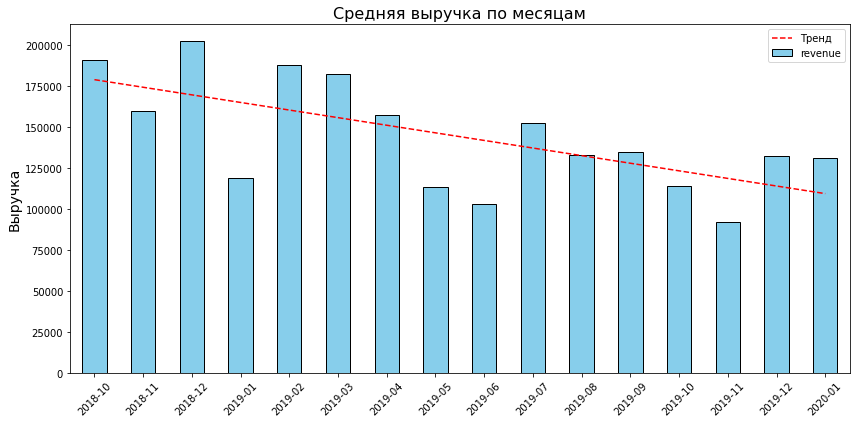

In [63]:
# Строим график выручки по месяцам
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', 
                     color='skyblue',
                     edgecolor='black')

# Для линии тренда преобразуем индекс в числовой формат
x = np.arange(len(monthly_revenue))

# Вычисляем коэффициенты для линейного тренда
z = np.polyfit(x, monthly_revenue, 1)

# Создаем функцию линии тренда
p = np.poly1d(z)

# Добавляем линию тренда на график
plt.plot(x, p(x), "r--", label='Тренд')

# Подписываем оси и легенду
plt.title('Средняя выручка по месяцам', fontsize=16)
plt.ylabel('Выручка', fontsize=14)
plt.xlabel('')
plt.legend()
plt.xticks(x, monthly_revenue.index, rotation=45)
plt.tight_layout()

# Отображение
plt.show()


По всей видимости выручка от сезона не зависит, если в 2018 году был пик выручки в декабре, то в 2019 году нет особой разницы в декабре и январе. Может быть количество товаров в корзине зависит от месяца?

In [64]:
# Группируем данные по новому столбцу с месяцем и 'order_id', подсчитываем сумму по 'quantity' для каждого заказа
monthly_order_quantity = ecom.groupby(['month_year', 'order_id'])['quantity'].sum().reset_index()

# Затем считаем среднее количество товаров в заказе по месяцам
average_items_per_month = monthly_order_quantity.groupby('month_year')['quantity'].mean()

In [65]:
# Группируем данные по месяцу и ID заказа, затем подсчитываем уникальные продукты
unique_products_per_order_month = ecom.groupby(['month_year', 'order_id'])['product'].nunique()

# Считаем среднее количество уникальных продуктов на заказ по месяцам
average_unique_products_per_month = unique_products_per_order_month.groupby(level=0).mean()

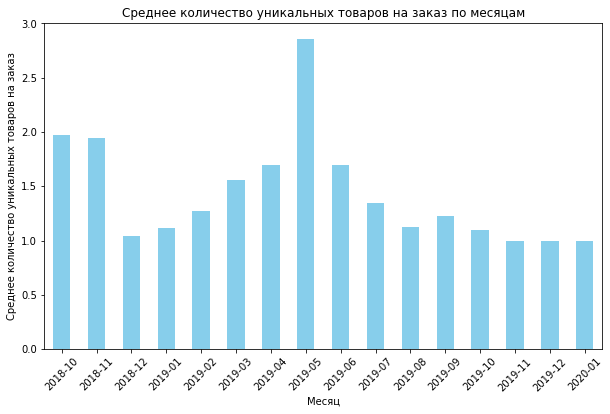

In [66]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
average_unique_products_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество уникальных товаров на заказ')
plt.title('Среднее количество уникальных товаров на заказ по месяцам')
plt.xticks(rotation=45)

plt.show()

Кажется в мае чуть больше товаров на один заказ

Подвывод: Строгой сезонности в общей картине продажах не наблюдается

### Анализ категорий товара.

Анализ категорий товара. Здесь планируется разделить товар на категории, например "кухня", "сад и огород". Затем проанализировать какие категории продаются лучше, какие приносят больше прибыли и тд. 

#### Создание категорий

Разделение товаров по категорям я попробовала сделать с помощью библиотеки  spacy, она предоставляет предварительно обученные модели для разных языков (в том числе на русском), которые могут использоваться для анализа текстов, включая категоризацию и лемматизацию

In [67]:
import spacy

In [68]:
!python -m spacy download ru_core_news_md

     |████████████████████████████████| 43.0 MB 5.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [69]:
nlp = spacy.load("ru_core_news_md")

In [70]:
from collections import Counter

In [71]:
# запись в переменную уникальных значений из столбца 'product'
product_unique = ecom['product'].unique() 

In [72]:
# Сортировка уникальных значений по алфавиту
sorted_product_unique = sorted(product_unique)


In [73]:
# # вывод всех значений


# for item in sorted_product_unique:
#     print(item)

Сначала, с помощью загруженной нейросети нам нужно выявить наиболее часто используемые леммы в вашем наборе данных.

In [74]:
# Функция для проверки, является ли токен стоп-словом или пунктуацией
def is_useful_token(token):
    return not token.is_stop and not token.is_punct and not token.is_digit

# Сюда будем собирать все леммы
all_lemmas = []

# проходим по списку уникальных названий продуктов
for product in product_unique:
    doc = nlp(product)
    all_lemmas.extend([token.lemma_ for token in doc if is_useful_token(token)])


In [75]:
from collections import Counter

# Подсчитываем частоту каждой леммы в списке
lemma_frequency = Counter(all_lemmas)

In [76]:
# Выводим наиболее часто используемые леммы, исключая стоп-слова и пунктуацию
print("Наиболее часто используемые леммы:")
for lemma, frequency in lemma_frequency.most_common(10):  # Измените число для вывода большего количества лемм
    print(f"{lemma}: {frequency}")

Наиболее часто используемые леммы:
см: 930
л: 210
рассада: 176
белый: 145
шт: 135
бельё: 133
сорт: 124
доска: 116
сушилка: 107
красный: 106


In [77]:
from nltk import bigrams

# Функция для удаления стоп-слов и пунктуации, а также для извлечения биграмм
def extract_bigrams(text):
    doc = nlp(text)
    # Удаляем стоп-слова и пунктуацию, извлекаем леммы
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # Используем NLTK для создания биграмм
    return list(bigrams(tokens))

# Список для хранения всех биграмм
all_bigrams = []

# Итерация по всем уникальным названиям продуктов и извлечение биграмм
for product in product_unique:
    all_bigrams.extend(extract_bigrams(product))

# Подсчёт частоты каждой биграммы
bigram_frequency = Counter(all_bigrams)

In [78]:
# Вывод наиболее часто используемых биграмм
print("Наиболее часто используемые биграммы:")
for bigram, frequency in bigram_frequency.most_common(10):
    print(f"{' '.join(bigram)}: {frequency}")

Наиболее часто используемые биграммы:
сушилка бельё: 106
гладильный доска: 98
d-12 см: 67
0,5 л: 62
объём 0,5: 60
6 шт: 53
томат помидор: 53
сумка тележка: 53
ванный комната: 51
рассада зелень: 50


Теперь разобьем леммы на категории товара. К сожалению, моделей без обучения для этой задачи найти не удалось.

In [79]:
# Уточненные ключевые слова для каждой категории
category_keywords = {
    'Ванная и Туалет': [
    'ванн', 'вантуз', 'влаговпитывающий', 'душ', 'ерш', 'зубная', 'коврик для ванной комнаты', 'мыло',
    'раковина', 'сантехника', 'таз', 'туалет', 'унитаз'
],
    'Кухонные принадлежности': [
    'банка', 'бидон', 'блюдце', 'блюдо','бокал', 'бокалов', 'бульонница', 'варка', 'венчик', 'вилка', 'выпечка', 
    'губка', 'дессерт', 'жаровня', 'завтрак','кастрюля' 'ковш', 'кружек', 'кружка', 'кувшин', 'кухонный', 'ложка', 
    'миска', 'нож', 'обед', 'посуда', 'противень', 'разделочная', 'салатник', 'салфетка', 'сахарница', 
    'скалка', 'скатерть','сковород', 'соковыжималка', 'сотейник', 'стакан', 'стаканов', 'столовая', 'столовых', 'суп', 
    'тарелка', 'терка', 'термос', 'фужер', 'хлебница', 'чай', 'чайник', 'штопор'
],
    'Уборка и моющие средства': [
    'ведро', 'веник', 'мешки', 'моющие средства', 'мытья', 'пылесос', 'уборка', 'швабра', 'щетка'
]
,
'Для сада': [ 
    'азалия',
    'адиантум', 'аквилегия', 'алоэ', 'алиссум', 'альбука', 'амариллис', 'анемона', 'антуриум', 'аптения', 'арбуз' 
    'артемизия', 'аспарагус', 'афеляндра', 'бадан', 'бакопа', 'бальзамин', 'бархатцы', 'базилик',
    'бегония', 'вербейник', 'вербена', 'вероника', 'гайлардия', 'гардения', 'гвоздик', 'герань',
    'гербера', 'гиацинт', 'гимнокалициум', 'гипсофила', 'глоксиния', 'горох', 'гортензия', 'горшок',
    'декабрист', 'дендробиум', 'джункус', 'диффенбахия', 'драцена', 'дыня','замиокулькас', 'зверобой',
    'земляника', 'змееголовник', 'импатиенс', 'иссоп', 'калатея', 'календула', 'калла', 'каллуна',
    'калоцефалус', 'камнеломка', 'кампанула', 'капсикум', 'каланхое', 'калибрахоа', 'капуста', 
    'кашпо', 'клен', 'колокольчик', 'кореопсис', 'кориандр', 'космея', 'котовник', 'кофе арабика',
    'крассула', 'крокусы', 'кротон', 'кумкват', 'лаванда', 'лаватера', 'лавр', 'лантана', 
    'лапчатка', 'лен', 'лиана', 'лилейник', 'литопс', 'лобелия', 'львиный зев', 'мединилла', 
    'мелисса', 'мимоза', 'мирт', 'молодило', 'монарда', 'морковь', 'муррайя', 'мускари', 'мята',
    'настурция', 'огурец', 'однолетнее', 'папоротник', 'патиссон', 'пеларгония', 'петрушка', 'петуния', 
    'подсолнечник', 'пуансетия', 'пуансеттия', 'примула', 'радермахера', 'ранункулус', 'рассада','растение' 
    'роза', 'розмарин', 'рукола', 'рудбекия', 'сад', 'седум', 'соланум', 'сорт', 'спатифиллум', 
    'суккулент', 'тимьян', 'тюльпан', 'томат', 'фаленопсис', 'фатсия', 'фиалка', 'физостегия', 
    'фикус', 'фиттония', 'флокс', 'фуксия', 'хамедорея', 'хлорофитум', 'хризантема', 'хризолидокарпус лутесценс', 
    'цветок', 'цикламен', 'цинния', 'циперус', 'цитрофортунелла', 'чабер', 'черенок', 'шалфей', 
    'эвкалипт', 'энотера', 'эпипремнум', 'эхеверия', 'эхинокактус', 'юкка', 'ясколка'
],
    'Текстиль и постельные принадлежности': [
    'бельё', 'вешалк', 'вешалок', 'гладильн', 'гладильная доска', 'двуспальное', 'ковер', 'наволочка', 
    'плед','плечики', 'пододеяльник', 'полотенце', 'постельное белье', 'простыня', 'прищепки', 'сушилка'
],

    'Интерьер и Декор': [
    'ваза', 'интерьерный', 'искусственный', 'коврик', 'корвер', 'комнатное','лампы', 'муляж', 'полк',
        'светильник', 'шторы'
],

    'Хранение': [
    'вакуумный пакет', 'емкость', 'контейнер', 'корзина', 'коробка', 'сумка', 'стремянка', 'чехол', 'этажерка', 'ящик', 
        'хранен'
]
}

# Инициализация категорий и категории "Другое"
product_categories = {category: [] for category in category_keywords.keys()}
product_categories["Другое"] = []


Присваиваем каждому уникальному продукту категорию

In [80]:
for product in sorted_product_unique: # Проходим по каждому продукту из списка уникальных продуктов
    doc = nlp(product)  # Создаем объект Doc для текущего продукта, чтобы анализировать его текст
    categorized = False  # Переменная для отслеживания, был ли продукт отнесен к какой-либо категории

    for token in doc: # Проходим по каждому токену (слову) в тексте продукта
        for category, keywords in category_keywords.items():
            # Проходим по каждой категории и ее ключевым словам
            # Проверяем, содержит ли текущий токен ключевые слова для данной категории
            if any(keyword in token.text.lower() for keyword in keywords):
                # Если хотя бы одно ключевое слово из категории найдено в тексте токена
                # добавляем текущий продукт в соответствующую категорию
                product_categories[category].append(product)
                categorized = True
                break  # Прерываем внутренний цикл, так как продукт уже категоризирован

    if not categorized:
        # Если продукт не был категоризирован (не подходит ни под одну категорию)
        # Добавляем его в категорию "Другое"
        product_categories["Другое"].append(product)

Посмотрим, как распределеились продукты по категориям

In [81]:
for category, products in product_categories.items():
    print(f"Категория: {category}")
    for product in products:
        print(product)
    print("\n")  # Добавляем пустую строку между категориями для читаемости


Категория: Ванная и Туалет
Ёрш унитазный пластмассовый, Ваир 1712002
Ёрш унитазный с деревянной ручкой , Ваир 1712012
Ёрш унитазный с подставкой WC "Люкс", Мультипласт, 1712007
Ёрш унитазный с подставкой WC "Стандарт", Мультипласт 1712010
Ароматизированное средство дудаления известкового налета и ржавчины DECS WC Гель Лимон 750 мл Россия 4660015923235
Ванна 70 л оцинкованная г.Магнитогорск, 1301016
Ванна 70 л оцинкованная г.Магнитогорск, 1301016
Вантуз черный с длинной ручкой (D-110 мм, L-380 мм), 1206007
Вантуз черный с пластиковой ручкой малый Д-100 (МАГ), 1206002
Гипоаллергенный концентрированный гель для стирки белья VPK для деликатных тканей 2,5 л Корея 8809473130144
Держатель для туалетной бумаги С373 "Полимербыт" 1713006
Душица обыкновенная d-9 см
Ерш для туалета с подставкой MALIBU фарфор 47х12,5 см белый, Spirella, 1001768
Ерш для туалета с подставкой MALIBU фарфор 47х12,5 см белый, Spirella, 1001768
Жидкое мыло Vestar Хозяйственное 750 мл Россия 4620757212370
Запасная насадка

Теперь у нас есть словарь product_categories, где ключи - это категории, а значения - списки продуктов. Мы можем сделать новую колонку в датасете с категорией на основании этого словаря, но сначала поменяем местами в словаре ключи и значения, иначе поиск будет не такой эффективный (и питон ругается)

In [82]:
# создаем новый словарь где ключи, это названия продуктов, а значения - категории
product_to_category = {}
for category, products in product_categories.items():
    for product in products:
        product_to_category[product.lower()] = category

In [83]:
product_to_category

{'ёрш унитазный пластмассовый, ваир 1712002': 'Ванная и Туалет',
 'ёрш унитазный с деревянной ручкой , ваир 1712012': 'Ванная и Туалет',
 'ёрш унитазный с подставкой wc "люкс", мультипласт, 1712007': 'Ванная и Туалет',
 'ёрш унитазный с подставкой wc "стандарт", мультипласт 1712010': 'Ванная и Туалет',
 'ароматизированное средство дудаления известкового налета и ржавчины decs wc гель лимон 750 мл россия 4660015923235': 'Для сада',
 'ванна 70 л оцинкованная г.магнитогорск, 1301016': 'Ванная и Туалет',
 'вантуз черный с длинной ручкой (d-110 мм, l-380 мм), 1206007': 'Ванная и Туалет',
 'вантуз черный с пластиковой ручкой малый д-100 (маг), 1206002': 'Ванная и Туалет',
 'гипоаллергенный концентрированный гель для стирки белья vpk для деликатных тканей 2,5 л корея 8809473130144': 'Ванная и Туалет',
 'держатель для туалетной бумаги с373 "полимербыт" 1713006': 'Ванная и Туалет',
 'душица обыкновенная d-9 см': 'Ванная и Туалет',
 'ерш для туалета с подставкой malibu фарфор 47х12,5 см белый, s

Проходим по столбцу продуктов и присваиваем категорию в новый столбец

In [84]:
# Функция для назначения категории продукту, простое вхождение в строку
def assign_category(product_name):
    for product, category in product_to_category.items():
        if product.lower() in product_name.lower(): 
            return category
    return 'Другое'  # Возвращаем 'Другое', если продукт не соответствует ни одной категории

In [85]:
# Создаем новый столбец 'Категория' с использованием функции 
ecom['category'] = ecom['product'].map(assign_category)

In [86]:
# Проверяем результат
ecom.head(10)

,date,customer_id,order_id,product,quantity,price,revenue,month_year,category
7473,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0,104.0,2020-01,Текстиль и постельные принадлежности
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01,Для сада
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01,Другое
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Для сада
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01,Для сада
7468,2020-01-30 08:00:00,370ed405-57f6-4eff-ab2e-a0bacab6e982,102891,Пеларгония зональная Ринго Вайт d-7 см h-10 см...,1,74.0,74.0,2020-01,Для сада
7467,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,1,2399.0,2399.0,2020-01,Для сада
7466,2020-01-29 14:00:00,904015ba-31f2-4ce4-b68e-02362280a43d,107214,Ящик почтовый металлический с ушками для навес...,1,172.0,172.0,2020-01,Хранение
7465,2020-01-29 13:00:00,0b2157e5-101e-4e0e-bfaf-7340ed23e574,111547,"Коврик придверный, полипропилен, 40х70 см, Kok...",1,749.0,749.0,2020-01,Интерьер и Декор
7464,2020-01-29 13:00:00,28437f82-c2a8-41ea-a7c1-bcedece59d8b,102658,"Гладильная доска НИКА 3+ 122х34,5 см Н3+",1,1124.0,1124.0,2020-01,Текстиль и постельные принадлежности


Теперь, когда мы присвоили каждому продукту в датасете категорию, можно приступить к анализу.

#### Анализ выручки с разных категорий

In [87]:
# Группируем данные
category_revenue = ecom.groupby('category')['revenue'].sum().sort_values(ascending = False)

In [88]:
category_revenue

category
Хранение                                579916.916667
Текстиль и постельные принадлежности    527064.000000
Для сада                                413957.333333
Интерьер и Декор                        198479.166667
Кухонные принадлежности                 197023.000000
Другое                                  189911.500000
Ванная и Туалет                         141725.000000
Уборка и моющие средства                 60758.500000
Name: revenue, dtype: float64

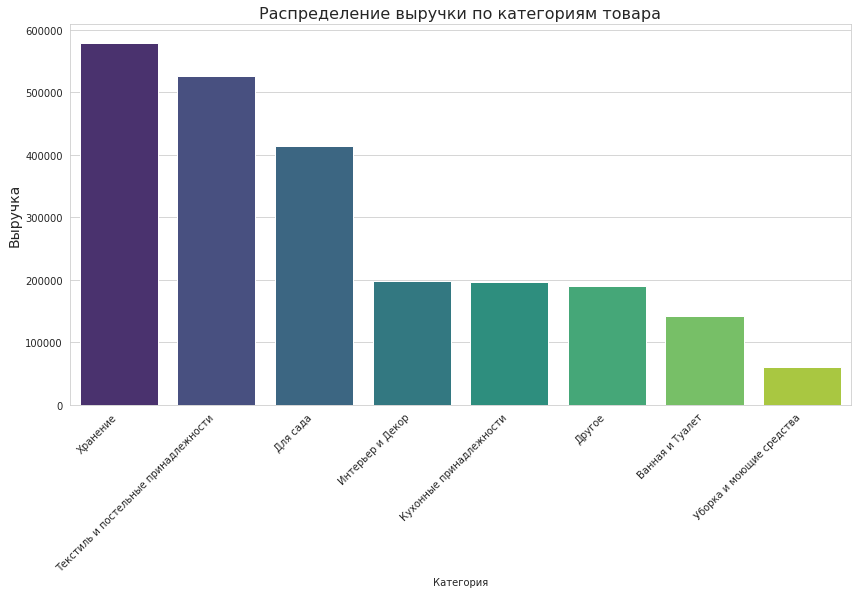

In [89]:
# Настройка стиля графиков
sns.set_style("whitegrid")

# Построение графика
plt.figure(figsize=(14,7))
category_counts_plot = sns.barplot(x=category_revenue.index, 
                                   y=category_revenue.values,
                                  palette="viridis")

# Добавление подписей
plt.title("Распределение выручки по категориям товара", fontsize=16)
plt.ylabel("Выручка",fontsize=14)
plt.xlabel("Категория")
category_counts_plot.set_xticklabels(category_counts_plot.get_xticklabels(), 
                                     rotation=45,
                                     ha="right")

# Отображение
plt.show()

Самые прибыльные категории товара это Хранение, Текстиль и Для сада. Посмотрим на самые продаваемые товары в этих категориях.

In [90]:
# Отфильтровываем данные по 3 самым прибыльным категорям
top3_ecom = (
    ecom[ecom['category'].isin(['Для сада', 'Текстиль и постельные принадлежности', 'Хранение'])]
)

In [91]:
top3_ecom.head()

,date,customer_id,order_id,product,quantity,price,revenue,month_year,category
7473,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0,104.0,2020-01,Текстиль и постельные принадлежности
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01,Для сада
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Для сада
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01,Для сада
7468,2020-01-30 08:00:00,370ed405-57f6-4eff-ab2e-a0bacab6e982,102891,Пеларгония зональная Ринго Вайт d-7 см h-10 см...,1,74.0,74.0,2020-01,Для сада


In [92]:
# Считаем суммарное количество продаж каждого товара внутри категории
top_products = top3_ecom.groupby('product')['quantity'].sum().sort_values(ascending=False)

In [93]:
# Получаем уникальные категории из столбца 'category'
unique_categories = top3_ecom['category'].unique()

# Проходим по каждой уникальной категории в DataFrame
for category in unique_categories:
    # Фильтруем по текущей категории
    category_data = top3_ecom[top3_ecom['category'] == category]
    
    # Считаем суммарное количество продаж каждого товара внутри категории
    top_products = category_data.groupby('product')['quantity'].sum().sort_values(ascending=False).head(10)
    
    # Выводим топ-10 товаров для текущей категории
    print(f"Топ-10 товаров категории {category}:")
    print(top_products)
    print("\n")  # Добавляем пустую строку для лучшей читаемости

Топ-10 товаров категории Текстиль и постельные принадлежности:
product
Вешалка с закругленными плечиками перекладиной и крючками с противоскользящим покрытием Valiant 213R11 черный    23
Сушилка для белья настенная Zalger Prima 510-720 веревочная 7 линий 25 м                                         19
Гладильная доска НИКА ДСП ЭКОНОМ 106,5х29 ЭК1                                                                    17
Вешалка-плечики без эссенции цвет тёмно-розовый FWM/L-Pink                                                       15
Вешалка-перекладина Valiant металлическая двойная с антискользящим покрытием 50320                               12
Сушилка для белья потолочная Лиана 2,0 м 1703009                                                                 11
Кухонное полотенце махровое 42х28 см WELLNESS ФРЕШ-mix                                                           10
Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331                        10
В

Самые популярные товары — это сумка-тележка в категории "Хранение", в категории "Текстиль и постельные принадлежности" это, в основном, вешалки и сушилки, а в категории "Для сада" — семена Пеларгонии.

#### Сезонность продаж самых прибыльных категорий

Проанализируем товары из трех самых прибыльных катогории на сезонность.

In [94]:
# Создаем сводную таблицу только с отфильтрованными данными
pivot = top3_ecom.pivot_table(
    index='month_year', 
    columns='category', 
    values='revenue',
    aggfunc='sum'
)

In [95]:
pivot

category,Для сада,Текстиль и постельные принадлежности,Хранение
month_year,,,
2018-10,28035.000000,43394.0,47946.000000
2018-11,21906.000000,36681.0,42220.000000
2018-12,10885.000000,60501.0,58459.000000
2019-01,7786.000000,37226.0,26626.000000
2019-02,29495.000000,42280.0,57110.000000
2019-03,43898.000000,35646.0,37693.000000
2019-04,51928.000000,18778.0,34925.000000
2019-05,50331.000000,15555.0,23848.000000
2019-06,24588.000000,33207.0,21428.000000


<AxesSubplot:xlabel='month_year'>

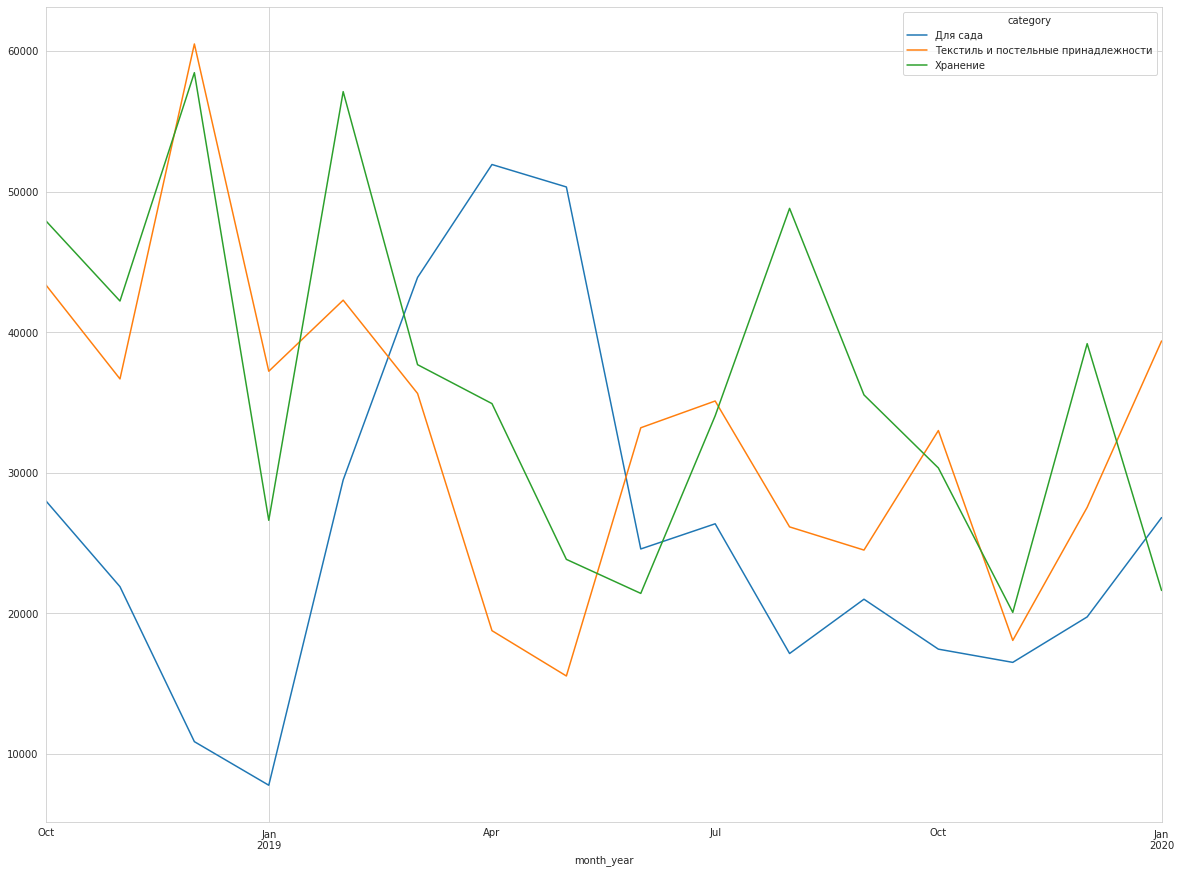

In [96]:
pivot.plot(figsize=(20, 15), grid=True)
# Строим график из сводной таблицы.


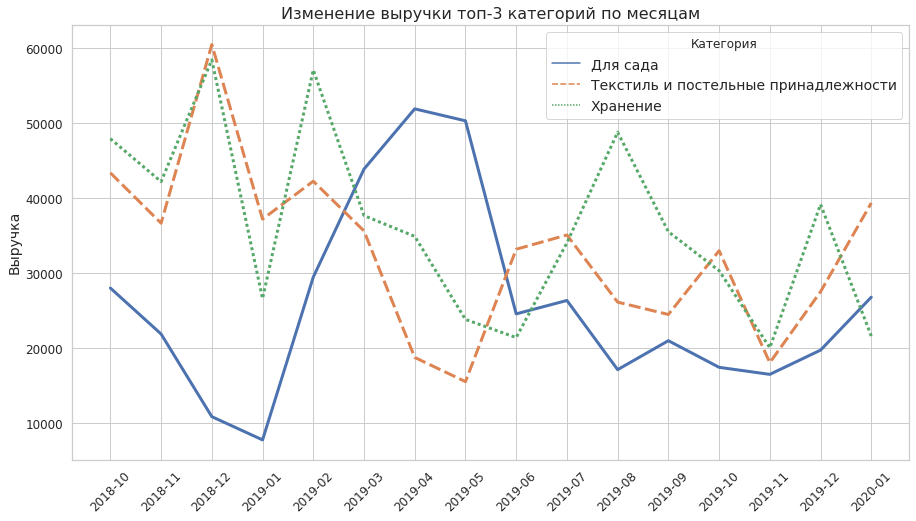

In [97]:
# Устанавливаем стиль графика
sns.set(style="whitegrid")

# Увеличиваем размер графика
plt.figure(figsize=(15, 8))

# Преобразуем индексы в строки
pivot.index = pivot.index.astype(str)

# Строим график
sns.lineplot(data=pivot, linewidth=3)

# Устанавливаем заголовки и подписи
plt.title('Изменение выручки топ-3 категорий по месяцам', fontsize=16)
plt.xlabel('')
plt.ylabel('Выручка', fontsize=14)
plt.legend(title='Категория', loc='best', fontsize=14)

# размер меток на осях
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Отображаем график
plt.show()

Категория "Для сада" показывает повышенные продажи в периоды весны и раннего лета (март-май), что, вероятно, связано с началом сезона посадки (в этой категории в основном семена). После этого виден спад в летние месяцы, и минимум в зимние месяца.

Категория "Текстиль и постельные принадлежности" демонстрирует наибольшую выручку в декабре, что может быть связано с новогодними праздниками и повышенным спросом на подарки. 

Флуктуации в категории 'Хранение' врядли можно объяснить сезонностью.

#### Сегментация пользвателей на основе предпочетений товаров в категории

In [98]:
# создание сводной таблицы
customer_purchases = ecom.pivot_table(
    index='customer_id', 
    columns='category', 
    values='revenue', 
    aggfunc='sum', 
    fill_value=0
)

In [99]:
# создания нового столбца с названием категории, где у каждого покупателя максимальное значение выручки
customer_purchases['preferred_category'] = customer_purchases.idxmax(axis=1)

In [100]:
customer_purchases

category,Ванная и Туалет,Для сада,Другое,Интерьер и Декор,Кухонные принадлежности,Текстиль и постельные принадлежности,Уборка и моющие средства,Хранение,preferred_category
customer_id,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0,555.0,0.0,0.0,0.0,0.0,0.0,0.0,Для сада
001cee7f-0b29-4716-b202-0042213ab038,0,0.0,0.0,0.0,0.0,442.0,0.0,0.0,Текстиль и постельные принадлежности
00299f34-5385-4d13-9aea-c80b81658e1b,0,0.0,914.0,0.0,0.0,0.0,0.0,0.0,Другое
002d4d3a-4a59-406b-86ec-c3314357e498,0,0.0,0.0,0.0,0.0,0.0,0.0,1649.0,Хранение
003bbd39-0000-41ff-b7f9-2ddaec152037,0,0.0,2324.0,0.0,0.0,0.0,0.0,0.0,Другое
...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,0,90.0,0.0,0.0,0.0,0.0,0.0,1649.0,Хранение
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ванная и Туалет
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0,0.0,389.0,0.0,0.0,0.0,0.0,0.0,Другое


Теперь зная какая категория товаров наиболее предпочтительна для каждого покупателя на основе их предыдущих покупок, мы можем использовать эту информацию для формирования персональных рекомендаций. 

In [101]:
display(ecom.head(10))

,date,customer_id,order_id,product,quantity,price,revenue,month_year,category
7473,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0,104.0,2020-01,Текстиль и постельные принадлежности
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01,Для сада
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,2020-01,Другое
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Для сада
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,2020-01,Для сада
7468,2020-01-30 08:00:00,370ed405-57f6-4eff-ab2e-a0bacab6e982,102891,Пеларгония зональная Ринго Вайт d-7 см h-10 см...,1,74.0,74.0,2020-01,Для сада
7467,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,1,2399.0,2399.0,2020-01,Для сада
7466,2020-01-29 14:00:00,904015ba-31f2-4ce4-b68e-02362280a43d,107214,Ящик почтовый металлический с ушками для навес...,1,172.0,172.0,2020-01,Хранение
7465,2020-01-29 13:00:00,0b2157e5-101e-4e0e-bfaf-7340ed23e574,111547,"Коврик придверный, полипропилен, 40х70 см, Kok...",1,749.0,749.0,2020-01,Интерьер и Декор
7464,2020-01-29 13:00:00,28437f82-c2a8-41ea-a7c1-bcedece59d8b,102658,"Гладильная доска НИКА 3+ 122х34,5 см Н3+",1,1124.0,1124.0,2020-01,Текстиль и постельные принадлежности


In [102]:
# группируем данные по категории и считаем уникальные customer_id
customer_counts = ecom.groupby('category')['customer_id'].nunique().reset_index()

# Теперь сортируем данные по количеству клиентов в убывающем порядке
customer_counts = customer_counts.sort_values(by='customer_id', ascending=False)

In [103]:
customer_counts

,category,customer_id
1,Для сада,847
7,Хранение,459
5,Текстиль и постельные принадлежности,441
3,Интерьер и Декор,300
4,Кухонные принадлежности,294
2,Другое,268
0,Ванная и Туалет,190
6,Уборка и моющие средства,53


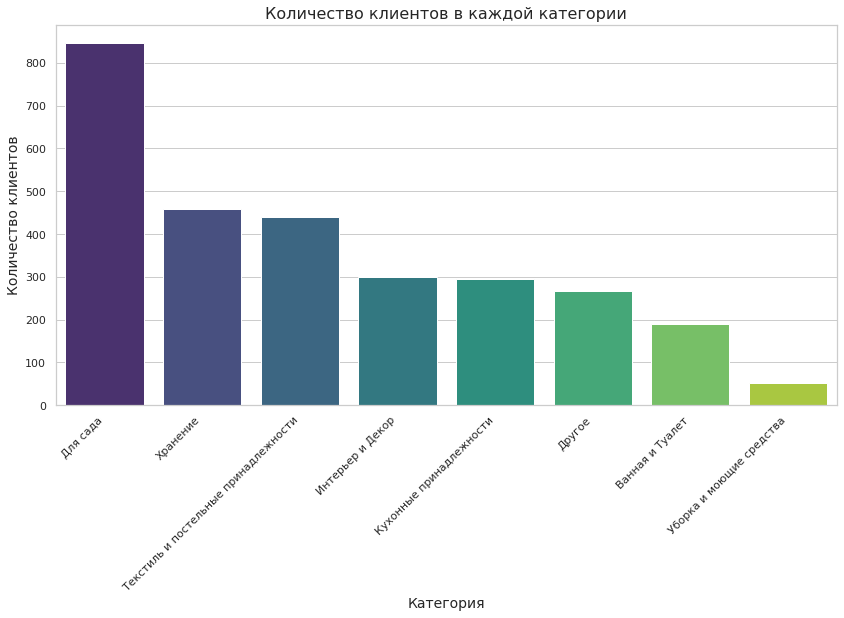

In [104]:
# Построение барного графика
plt.figure(figsize=(14, 7))
customer_counts_plot = sns.barplot(x='category',
                                   y='customer_id',
                                   data=customer_counts,
                                   palette="viridis")

# Добавление заголовков и меток
plt.title("Количество клиентов в каждой категории", fontsize=16)
plt.ylabel("Количество клиентов", fontsize=14)
plt.xlabel("Категория", fontsize=14)

# Поворот подписей категорий для лучшей читаемости
customer_counts_plot.set_xticklabels(customer_counts_plot.get_xticklabels(),
                                     rotation=45, 
                                     horizontalalignment='right')

# Отображение графика
plt.show()

Наиболее популярная категория 'Для сада', за ней с большим отрывом идет 'Хранение' и 'Текстиль'. Меньше всего покупателей заинтересованных в основной категории как 'Ванная' и 'Уборка'.

Подвывод: Категории "Хранение", "Текстиль" и "Для сада" являются лидерами по прибыльности. В "Хранении" лидирует сумка-тележка, в "Текстиле" - вешалки и сушилки, а "Для сада" выделяются семена Пеларгонии.

товары катогории "Для сада" отмечает всплеск продаж в весенне-летний период, что коррелирует с сезоном посадки. Затем продажи снижаются, достигая минимума зимой.

В "Текстиле" пик приходится на декабрь, возможно, из-за покупки подарков к новогодним праздникам.

Продажи в "Хранении" кажутся стабильными без ярко выраженной сезонности.

### Анализ RMF

Анализ RFM учитывает три признака: recency (давность покупки), frequency (частота покупок) и monetary (сумма трат клиента). Такая сегментация позволит выделить категории пользователей, которые уже лояльны, и их можно поощрять, и наоборот, найти категории "отстающих", которых можно простимулировать на покупки.

#### Рассчет показателей

Начнем с давности (recency)

In [105]:
# Находим максимальную дату в наборе
max_date = ecom['date'].max()

# извлекаем последнюю дату покупки
recency_df = ecom.groupby('customer_id')['date'].max().reset_index()
# переименовываем столбцы 
recency_df.columns = ['customer_id', 'LastPurchaseDate']

# рассчитываем количество дней с момента последней покупки до максимальной даты в наборе данных
recency_df['recency'] = (max_date - recency_df['LastPurchaseDate']).dt.days

Присвоим баллы по следующей логике: 1 балл, если давность последней покупки до 30 (недавние покупатели).
2 балла, если последняя покупка от 31 до 180 дней (сделали заказ в течение последнего полугода).
3 балла, если больше 180 дней не совершали покупки (давно совершавшие покупки клиенты).

In [106]:
# Функция для присвоения баллов
def recency_score(x):
    if x <= 30:
        return 1
    elif x <= 180:
        return 2
    else:
        return 3

# Применение функции для создания столбца с баллами
recency_df['R'] = recency_df['recency'].apply(recency_score)

In [107]:
display(recency_df.head())

,customer_id,LastPurchaseDate,recency,R
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,107,2
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,349,3
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,108,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,368,3
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,123,2


In [108]:
# Подсчет количества клиентов в каждой категории 'R'
r_counts = recency_df['R'].value_counts().sort_index()

In [109]:
r_counts 

1     262
2     789
3    1159
Name: R, dtype: int64

Дальше считаем частоту(frequency)

In [110]:
# Для каждого клиента подсчитаем количество уникальных заказов
frequency_df = ecom.groupby('customer_id')['order_id'].nunique().reset_index()
# переименовываем столбцы 
frequency_df.columns = ['customer_id', 'order_count']

Помним что максимальное количество заказов на покупателя у нас три. 
- 3 заказа - 1 бал, 
- 2 заказа - 2 балла, 
- 1 заказ - 3 балла.

In [111]:
# Определяем функцию для присвоения баллов на основе количества заказов
def assign_frequency_points(x):
    if x == 3:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

# Применяем функцию для создания нового столбца 'F'
frequency_df['F'] = frequency_df['order_count'].apply(assign_frequency_points)

In [112]:
frequency_df

,customer_id,order_count,F
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,3
1,001cee7f-0b29-4716-b202-0042213ab038,1,3
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,3
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,3
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,3
...,...,...,...
2205,ff601403-b094-4b86-9ac6-264d725b9277,2,2
2206,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,3
2207,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,3
2208,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,3


In [113]:
# Подсчет количества клиентов в каждой категории 'F'
f_counts = frequency_df['F'].value_counts().sort_index()

In [114]:
f_counts

1      17
2     780
3    1413
Name: F, dtype: int64

и осталось рассчитать прибыльность клиентов (monetary)

In [115]:
# Группировка данных по customer_id и расчет общей выручки для каждого клиента
monetary_df = ecom.groupby('customer_id')['revenue'].sum().reset_index()
monetary_df.columns = ['customer_id', 'customer_revenue']

можно разделить полученные данные на квантили, чтобы назначить баллы 

In [116]:
# разделим на квантили
monetary_labels = range(1, 4)

monetary_quartiles = pd.qcut(monetary_df['customer_revenue'], q=3, labels=monetary_labels)

monetary_df['M'] = monetary_quartiles.values

In [117]:
monetary_df

,customer_id,customer_revenue,M
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,2
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,3
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,3
...,...,...,...
2205,ff601403-b094-4b86-9ac6-264d725b9277,1739.0,3
2206,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,397.0,1
2207,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,389.0,1
2208,ffb80538-3fda-4351-8ea9-9d2bec58bb07,974.0,2


In [118]:
# Подсчет количества клиентов в каждой категории 'M'
m_counts = monetary_df['M'].value_counts().sort_index()

In [119]:
m_counts

1    740
2    735
3    735
Name: M, dtype: int64

Объединяем в одну таблицу

In [120]:
# Объединяем recency и frequency, выбираем нужные столбцы
rf_df = pd.merge(recency_df[['customer_id', 'R']], frequency_df[['customer_id', 'F']], on='customer_id')

# Объединяем rf_df с monetary, опять выбираем нужные столбцы
rfm_df = pd.merge(rf_df, monetary_df[['customer_id', 'M']], on='customer_id')

In [121]:
display(rfm_df)

,customer_id,R,F,M
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2,3,2
1,001cee7f-0b29-4716-b202-0042213ab038,3,3,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,2,3,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,3,3,3
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2,3,3
...,...,...,...,...
2205,ff601403-b094-4b86-9ac6-264d725b9277,1,2,3
2206,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2,3,1
2207,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,3,3,1
2208,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2,3,2


In [122]:
# Склеиваем значения R, F, и M, предварительно преобразуя их в строки
rfm_df['RFM_segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)

In [123]:
# Подсчёт количества клиентов в каждом сегменте
rfm_segment_counts = rfm_df['RFM_segment'].value_counts().reset_index()

# Переименовываем колонки
rfm_segment_counts.columns = ['RFM_segment', 'count']

In [124]:
rfm_segment_counts

,RFM_segment,count
0,331,398
1,332,375
2,333,286
3,223,220
4,231,161
5,222,140
6,232,107
7,123,106
8,221,89
9,122,83


Сегменты созданы, пора анализировать

#### Анализ пользователей на основе сегментов RFM

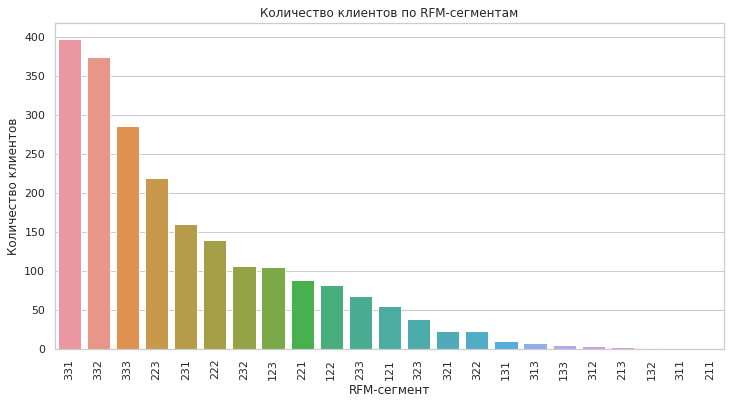

In [125]:
# Создание столбчатого графика
plt.figure(figsize=(12, 6))
sns.barplot(x='RFM_segment', 
            y='count', 
            data=rfm_segment_counts, 
            order=rfm_segment_counts['RFM_segment'])

# Добавление заголовка и меток
plt.title('Количество клиентов по RFM-сегментам')
plt.xlabel('RFM-сегмент')
plt.ylabel('Количество клиентов')

# Отображение графика
plt.xticks(rotation=90) # Поворачиваем метки на оси X для лучшей читаемости, если они слишком длинные
plt.show()


Добавим более осмысленные названия категорий для клиентов, чтобы понять соотношение сегментов.

In [126]:
# Определение словаря для сегментов
segment_dict = {
    '111': 'Чемпионы',
    '112': 'Лояльные клиенты',
    '113': 'Потенциальные лояльные',
    '121': 'Потенциальные лояльные',
    '122': 'Потенциальные лояльные',
    '123': 'Требующие внимания',
    '131': 'Высокопотенциальные',
    '132': 'Требующие внимания',
    '133': 'Требующие внимания',
    
    '211': 'Стабильные клиенты',
    '212': 'Стабильные клиенты',
    '213': 'Требующие внимания',
    '221': 'Требующие внимания',
    '222': 'Требующие внимания',
    '223': 'Требующие внимания',
    '231': 'Требующие внимания',
    '232': 'Требующие внимания',
    '233': 'Требующие внимания',
    
    '311': 'Потенциально потерянные',
    '312': 'Потенциально потерянные',
    '313': 'Потенциально потерянные',
    '321': 'Потенциально потерянные',
    '322': 'Полностью потерянные',
    '323': 'Полностью потерянные',
    '331': 'Полностью потерянные',
    '332': 'Полностью потерянные',
    '333': 'Полностью потерянные'
}

In [127]:
# Замена числовых значений на строковые и использование словаря для сегментации
rfm_df['RFM_segment'] = rfm_df['RFM_segment'].astype(str)
rfm_df['attention_segment'] = rfm_df['RFM_segment'].map(segment_dict)

In [128]:
rfm_df.head()

,customer_id,R,F,M,RFM_segment,attention_segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2,3,2,232,Требующие внимания
1,001cee7f-0b29-4716-b202-0042213ab038,3,3,1,331,Полностью потерянные
2,00299f34-5385-4d13-9aea-c80b81658e1b,2,3,2,232,Требующие внимания
3,002d4d3a-4a59-406b-86ec-c3314357e498,3,3,3,333,Полностью потерянные
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2,3,3,233,Требующие внимания


In [129]:
# Подсчёт количества клиентов в каждом сегменте
attention_segment_counts = rfm_df['attention_segment'].value_counts().reset_index()

# Переименовываем колонки
attention_segment_counts.columns = ['attention_segment', 'count']

In [130]:
attention_segment_counts

,attention_segment,count
0,Полностью потерянные,1122
1,Требующие внимания,901
2,Потенциальные лояльные,138
3,Потенциально потерянные,37
4,Высокопотенциальные,11
5,Стабильные клиенты,1


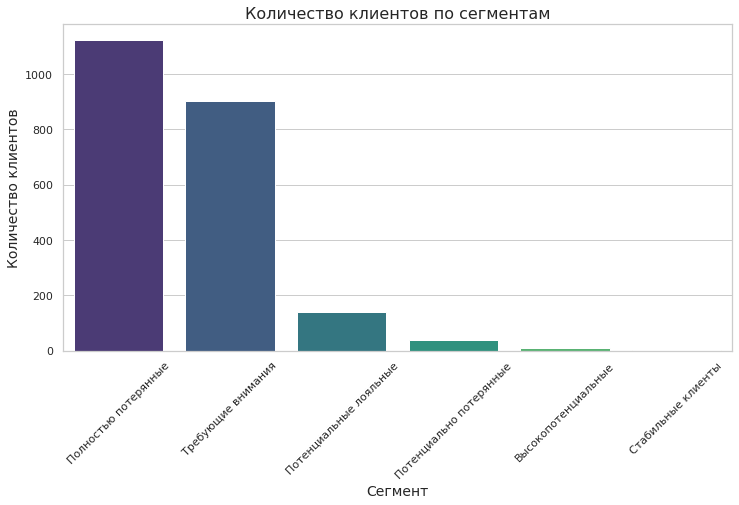

In [131]:
# Создание столбчатого графика
plt.figure(figsize=(12, 6))
sns.barplot(x='attention_segment', 
            y='count', 
            data=attention_segment_counts, 
            order=attention_segment_counts['attention_segment'],
            palette="viridis")

# Добавление заголовка и меток
plt.title('Количество клиентов по сегментам', fontsize=16)
plt.xlabel('Cегмент', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)

# Отображение графика
plt.xticks(rotation=45) # Поворачиваем метки на оси X для лучшей читаемости, если они слишком длинные
plt.show()


Похоже, что дела у магазина дела идут не очень хорошо, поскольку самый большой сегмент покупателей 'Полностью потерянные'. Возможно, магазин имеет проблему с удержанием клиентов или их повторными покупками. Сегмент с клиентами требующими внимания достаточно велик, что внушает надежду, но и эти клиенты могут уйти, если их не мотивировать на повторные покупки.Можно попробовать вовлечь этих клиентов обратно, например, через персонализированные маркетинговые кампании или специальные предложения, в том числе на основе товарных предпочтений. Сегмент 'Чемпионы' отсутствует, и лояльных тоже очень мало. Для лояльных и высокопотенциальных стоит разработать программы лояльности или предложение дополнительных стимулов для увеличения частоты покупок.

### Проверка гипотез

In [132]:
# загрузка библиотек
import scipy.stats as stats

Проверим гипотезу. Может клиенты потерянные не так важны, и средняя выручка от них меньше чем от лояльных? 

In [133]:
# добавим выручку каждому клиенту
rfm_df = rfm_df.merge(monetary_df[['customer_id', 'customer_revenue']], on='customer_id', how='left')

In [134]:
rfm_df.head()

,customer_id,R,F,M,RFM_segment,attention_segment,customer_revenue
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2,3,2,232,Требующие внимания,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,3,3,1,331,Полностью потерянные,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2,3,2,232,Требующие внимания,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,3,3,3,333,Полностью потерянные,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2,3,3,233,Требующие внимания,2324.0


Нулевая гипотеза (H0): Средняя выручка от клиентов в сегменте "Полностью потерянные" равна или меньше средней выручки от клиентов в сегменте "Лояльные клиенты".

Альтернативная гипотеза (H1): Средняя выручка от клиентов в сегменте "Полностью потерянные" больше средней выручки от клиентов в сегменте "Лояльные клиенты".

In [135]:
# подготовка данных для подачи в т-тест
lost_customers_revenue = (
    rfm_df.loc[rfm_df['attention_segment'] == 'Полностью потерянные', 'customer_revenue']
)

Соберем всех лояльных в одну категорию

In [136]:
# подготовка данных для подачи в т-тест
categories = (
    ['Потенциальные лояльные', 'Потенциально потерянные', 'Высокопотенциальные', 'Стабильные клиенты']
)
loyal_customers_revenue = rfm_df.loc[rfm_df['attention_segment'].isin(categories), 'customer_revenue']


In [137]:
# задаем значение альфа
alpha = 0.05

# проводим тест
results = stats.ttest_ind(
    lost_customers_revenue, 
    loyal_customers_revenue, 
    alternative='greater')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.3513224459967035e-08
Отвергаем нулевую гипотезу


В результате мы видим, что p-уровень очень маленький, это означает, что альтернативная гипотеза верна, что средняя выручка от "полностью потерянных" клиентов больше, чем средняя выручка от "лoяльных" клиентов.  "Полностью потерянные" клиенты могли приносить больше денег, чем те, которые сейчас считаются "лoяльными".

Теперь проверим, действительно ли есть разница в выручке между RFM сегментами, и наше разделение верное. Поскольку групп много, нам подойдет дисперсионный анализ (ANOVA).

Нулевая гипотеза H0 будет такая: Средние значения выручки (revenue) для всех сегментах клиентов равны. Инными слвами - категория не влияет на выручку.

Альтернативная гипотеза H1: По крайней мере, одна пара сегментов имеет статистически значимые различия в средних значениях выручки. То есть существует влияние категории внимания на выручку.

In [138]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [139]:
# Создание модели OLS для ANOVA
model = ols('customer_revenue ~ C(RFM_segment)', data=rfm_df).fit()

# Проведение ANOVA
anova_results = anova_lm(model, typ=2)

In [140]:
anova_results

,sum_sq,df,F,PR(>F)
C(RFM_segment),1.454795e+09,22.0,220.179077,0.0
Residual,6.568283e+08,2187.0,NaN,NaN


Число степеней свободы  = 22, это верно, поскольку у нас 22 сегмента, большое значение F указывает на то, что вариация между средними значениями групп большая, p-значение, практически равное нулю.

In [141]:
# Получение значений F и p-значения
f_value = anova_results.loc['C(RFM_segment)', 'F']
p_value = anova_results.loc['C(RFM_segment)', 'PR(>F)']

In [142]:
print(f" F-статистика равна {f_value:.2f} с p-значением {p_value:.20f}.")
if p_value < 0.05:
    print("Это позволяет нам отвергнуть нулевую гипотезу о равенстве средних между группами.")
else:
    print("У нас нет оснований отвергать нулевую гипотезу о равенстве средних между группами.")


 F-статистика равна 220.18 с p-значением 0.00000000000000000000.
Это позволяет нам отвергнуть нулевую гипотезу о равенстве средних между группами.


Таким образом, результаты дисперсионный анализ дают основания утверждать, что существуют статистически значимые различия в средней выручке между различными сегментами клиентов. Это означает, что сегментация клиентов, которую мы предлагаем, является эффективным способом различения групп клиентов по их выручке.

Подвывод: Достоверно показано, что "Полностью потерянные" клиенты приносили больше дохода, чем те "лояльные", которые есть сейчас.
Статистически подтверждено, что сегментация на основе RMF эффективна, и средняя выручка между сегментами различается.

### Вывод по проекту

Исседовательский анализ:
- Средние показатели: 3 заказа на клиента, 1,5 позиции в заказе, средний чек 763 рубля.
- Сезонности в общих продажах не выявлено.

Анализ категории товара:
- Лидеры по прибыли категории: "Хранение", "Текстиль" и "Для сада".
- Востребованные товары в каждой категории: сумки-тележки для категории "Хранение", вешалки и сушилки для категории "Текстиль", семена Пеларгонии, и другие семена в топ товаров категории "Для сада".
- Сезонноть категорий товара: в категории "Для сада" пик продаж весной-летом; "Текстиль": максимум в декабре; товары категории "Хранение" несезонные.
- Клиентская база была успешно сегментирована с учетом их предпочтений в товарах. Теперь, опираясь на историю покупок, мы обладаем информацией о самых востребованных категориях товаров для каждого клиента, что позволяет нам создавать индивидуализированные рекомендации товаров.


Анализ RFM
- Магазин сталкивается с проблемой удержания клиентов: большинство клиентов в категории "Полностью потерянные", покупали давно и мало.
- Есть потенциал для реактивации клиентов, почти половина всех клиентов в категории "Требующие внимания", для них можно сделать специальные предложение например, скидки на товары в интересующей их категории. 
- Очень маленький сегмент "Лояльных" и "Высокопотенциальных", нужно приложить все усилия чтобы их не потерять, например, предложить программы привелегий (возможно, бесплатная доставка, эксклюзивный доступ к новым товарам или специальные события)

Проверка гипотез:
- Подтверждена более высокая доходность "Полностью потерянных" клиентов по сравнению с "Лояльными", но раз эти клиенты были и ушли, возможно, стоит пересмотреть бизнес стратегии. Важно понять, почему эти клиенты перестали покупать. Для этого необходимо провести анализ причин оттока. Кроме того, очевидно, нужно пересмотреть стратегии удержания.
- Также статистическими методами показано, что RMF-сегментация эффективно различает клиентов по выручке.

### Сегментация пользователей на основе предпочтений с помощью k-means

Для сегментации пользователей по предпочтениям категорий товара будем использовать метод кластеризации (K-Means), в результате у каждого клиента будет метка сегмента, которая показывает, к какой группе по покупательскому поведению он относится. На основании доменной области его интересов каждому сегменту можно будет давать рекомендации товара.

In [143]:
# загрузка библиотек
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Для начала нужно собрать своднуюю таблицу по количеству купленных продуктов в каждой категории

In [154]:
# Сгруппировать данные и подсчитать количество позиций в каждой категории для каждого клиента
product_pivot = ecom.groupby(['customer_id', 'category']).agg({'quantity': 'sum'}).reset_index()

In [155]:
product_pivot

,customer_id,category,quantity
0,000d6849-084e-4d9f-ac03-37174eaf60c4,Для сада,4
1,001cee7f-0b29-4716-b202-0042213ab038,Текстиль и постельные принадлежности,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,Другое,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,Хранение,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,Другое,2
...,...,...,...
2847,ff601403-b094-4b86-9ac6-264d725b9277,Хранение,1
2848,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,Ванная и Туалет,1
2849,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,Другое,1
2850,ffb80538-3fda-4351-8ea9-9d2bec58bb07,Кухонные принадлежности,1


In [156]:
# Создать сводную таблицу
product_pivot_table = product_pivot.pivot_table(index='customer_id', columns='category', values='quantity', fill_value=0)

In [157]:
display(product_pivot_table)

category,Ванная и Туалет,Для сада,Другое,Интерьер и Декор,Кухонные принадлежности,Текстиль и постельные принадлежности,Уборка и моющие средства,Хранение
customer_id,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0,4,0,0,0,0,0,0
001cee7f-0b29-4716-b202-0042213ab038,0,0,0,0,0,1,0,0
00299f34-5385-4d13-9aea-c80b81658e1b,0,0,2,0,0,0,0,0
002d4d3a-4a59-406b-86ec-c3314357e498,0,0,0,0,0,0,0,1
003bbd39-0000-41ff-b7f9-2ddaec152037,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,0,1,0,0,0,0,0,1
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,0,0,0,0,0,0,0
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0,0,1,0,0,0,0,0


In [158]:
# Вычисляем общее количество покупок для каждого клиента
total_purchases = product_pivot_table.sum(axis=1)

In [159]:
total_purchases

customer_id
000d6849-084e-4d9f-ac03-37174eaf60c4    4
001cee7f-0b29-4716-b202-0042213ab038    1
00299f34-5385-4d13-9aea-c80b81658e1b    2
002d4d3a-4a59-406b-86ec-c3314357e498    1
003bbd39-0000-41ff-b7f9-2ddaec152037    2
                                       ..
ff601403-b094-4b86-9ac6-264d725b9277    2
ffaeab76-3a8d-49ee-860f-17273b2fc8a2    1
ffb5976a-7a4d-460b-95c4-5ffaba31cb24    1
ffb80538-3fda-4351-8ea9-9d2bec58bb07    1
ffe82299-3f5b-4214-87fe-3d36ecccfac3    1
Length: 2210, dtype: int64

In [160]:
# Рассчитываем долю покупок в каждой категории
proportion_table = product_pivot_table.div(total_purchases, axis=0)

In [161]:
proportion_table.head(5)

category,Ванная и Туалет,Для сада,Другое,Интерьер и Декор,Кухонные принадлежности,Текстиль и постельные принадлежности,Уборка и моющие средства,Хранение
customer_id,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
001cee7f-0b29-4716-b202-0042213ab038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
00299f34-5385-4d13-9aea-c80b81658e1b,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
002d4d3a-4a59-406b-86ec-c3314357e498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
003bbd39-0000-41ff-b7f9-2ddaec152037,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Необходимый этап нормализации перед kmeans

In [162]:
# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(proportion_table)

Чтобы использовать метод локтя(elbow method) для определения оптимального количества кластеров, нам нужно построить график, который показывает, как меняется сумма квадратов расстояний внутри кластеров (SSE) в зависимости от числа кластеров

In [163]:
sse = []
for k in range(1, 20):  # Проверяем количество кластеров от 1 до 20
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

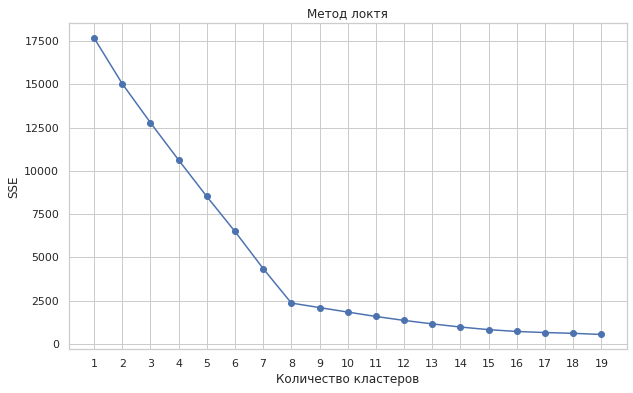

In [164]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), sse, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.xticks(range(1, 20))
plt.show()

В целом, видно, что оптимальное число целевых кластеров - 8, но для точного автоматического определения "локтя" нам нужно использовать метод KneeLocator из kneed библиотеки, но сначала нужно установить библиотеку kneed

In [165]:
!pip install kneed

In [166]:
from kneed import KneeLocator

In [167]:
kl = KneeLocator( range(1, 20), sse, curve="convex", direction="decreasing")

In [168]:
print("Оптимальное количество кластеров:", kl.elbow)

Оптимальное количество кластеров: 8


Теперь мы знаем, что оптимальное количество кластеров 8, попробуем применить.

In [169]:
km = KMeans(n_clusters=8, random_state=0)
labels = km.fit_predict(scaled_data)

In [170]:
proportion_table['cluster_km'] = labels

In [171]:
proportion_table

category,Ванная и Туалет,Для сада,Другое,Интерьер и Декор,Кухонные принадлежности,Текстиль и постельные принадлежности,Уборка и моющие средства,Хранение,cluster_km
customer_id,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
001cee7f-0b29-4716-b202-0042213ab038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
00299f34-5385-4d13-9aea-c80b81658e1b,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
002d4d3a-4a59-406b-86ec-c3314357e498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
003bbd39-0000-41ff-b7f9-2ddaec152037,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,4
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


Теперь каждому клиенту присвоен кластер согласно kmeans, и нужно их соотнести с категориями товара

In [172]:
# Группировка данных по кластерам и расчет средних значений
grouped = proportion_table.groupby('cluster_km').mean()

In [173]:
grouped

category,Ванная и Туалет,Для сада,Другое,Интерьер и Декор,Кухонные принадлежности,Текстиль и постельные принадлежности,Уборка и моющие средства,Хранение
cluster_km,,,,,,,,
0,0.002738,0.976039,0.007698,0.001452,0.003621,0.004314,0.000000,0.004137
1,0.000931,0.091061,0.001071,0.025838,0.000279,0.837058,0.000000,0.043762
2,0.001418,0.106777,0.733649,0.021277,0.029787,0.054610,0.000000,0.052482
3,0.000830,0.066634,0.002490,0.886374,0.000000,0.003596,0.000000,0.040076
4,0.002323,0.100304,0.000000,0.000608,0.000608,0.003040,0.000000,0.893118
5,0.019231,0.062500,0.038462,0.028846,0.028846,0.067308,0.721154,0.033654
6,0.777230,0.073344,0.011494,0.032567,0.027778,0.039272,0.000000,0.038314
7,0.001297,0.057717,0.001946,0.016861,0.830156,0.041829,0.001297,0.048898


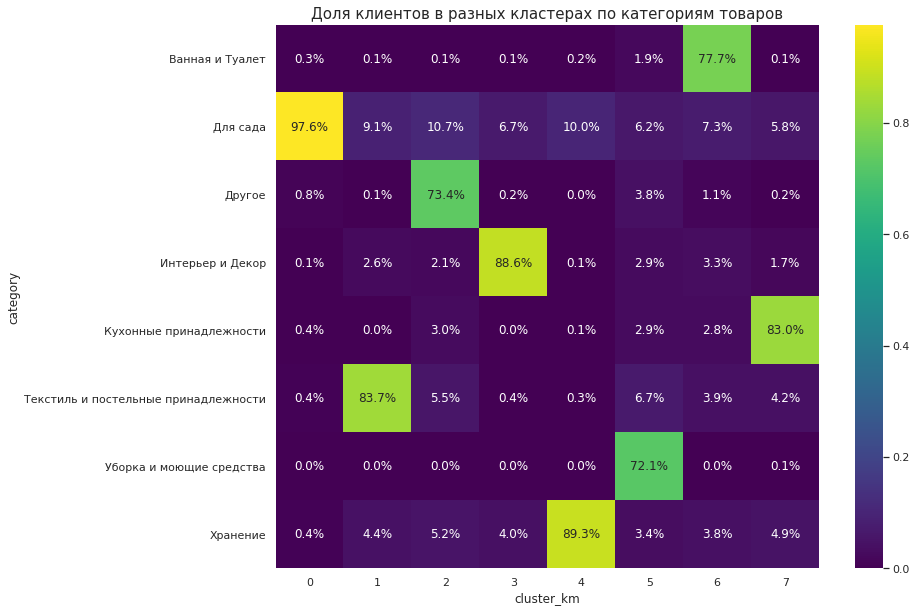

In [174]:
# Построение тепловой карты
plt.figure(figsize=(13,10))
plt.title('Доля клиентов в разных кластерах по категориям товаров', fontsize=15)
sns.heatmap(grouped.T, annot=True, cmap="viridis", square=True, fmt='.1%')
plt.show()

Отчетливо видно какой кластер соответствует какой категории товара

In [175]:
# создаем словарь с категориями
cluster_to_category_dict = {0: 'Для сада',
 1: 'Текстиль и постельные принадлежности',
 2: 'Другое',
 3: 'Интерьер и Декор',
 4: 'Хранение',
 5: 'Уборка и моющие средства',
 6: 'Ванная и Туалет',
 7: 'Кухонные принадлежности'}


In [176]:
# Добавление столбца 'dominant_category' в proportion_table
proportion_table['dominant_category'] = proportion_table['cluster_km'].map(cluster_to_category_dict)

In [177]:
proportion_table

category,Ванная и Туалет,Для сада,Другое,Интерьер и Декор,Кухонные принадлежности,Текстиль и постельные принадлежности,Уборка и моющие средства,Хранение,cluster_km,dominant_category
customer_id,,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Для сада
001cee7f-0b29-4716-b202-0042213ab038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Текстиль и постельные принадлежности
00299f34-5385-4d13-9aea-c80b81658e1b,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,Другое
002d4d3a-4a59-406b-86ec-c3314357e498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,Хранение
003bbd39-0000-41ff-b7f9-2ddaec152037,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,Другое
...,...,...,...,...,...,...,...,...,...,...
ff601403-b094-4b86-9ac6-264d725b9277,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,4,Хранение
ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,Ванная и Туалет
ffb5976a-7a4d-460b-95c4-5ffaba31cb24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,Другое


Кажется, все сработало как надо, посчитаем количество пользователей каждой категории

In [178]:
# Подсчет количества клиентов в каждой доминирующей категории
category_counts = proportion_table['dominant_category'].value_counts().reset_index()

# Даем новые названия столбцов
category_counts.columns = ['category', 'customer_count']

In [179]:
category_counts

,category,customer_count
0,Для сада,564
1,Текстиль и постельные принадлежности,358
2,Хранение,329
3,Кухонные принадлежности,257
4,Интерьер и Декор,241
5,Другое,235
6,Ванная и Туалет,174
7,Уборка и моющие средства,52


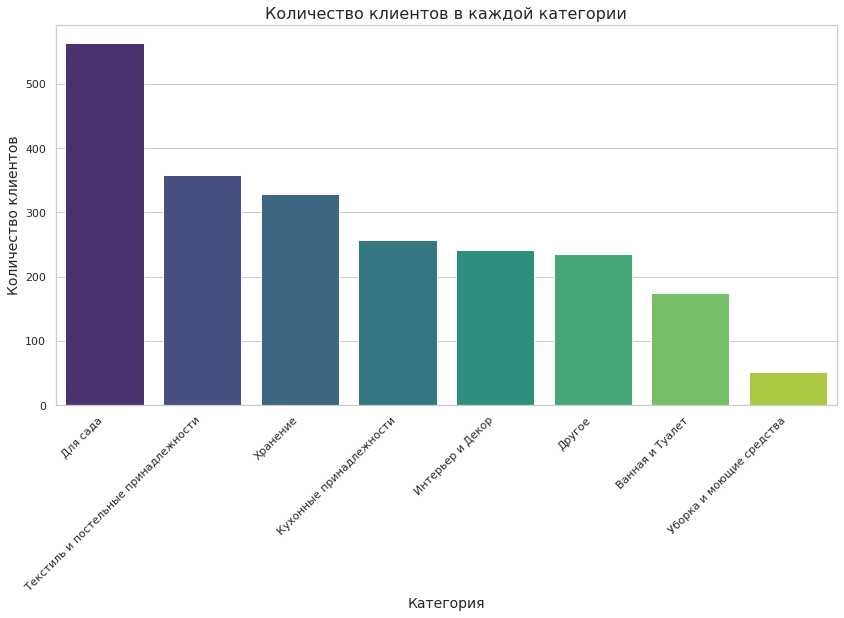

In [180]:
# Построение бар графика
plt.figure(figsize=(14, 7))
category_counts_plot = sns.barplot(x='category',
                                   y='customer_count',
                                   data=category_counts, 
                                   palette="viridis")

# Добавление заголовков и меток
plt.title("Количество клиентов в каждой категории", fontsize=16)
plt.ylabel("Количество клиентов", fontsize=14)
plt.xlabel("Категория", fontsize=14)

# Поворот подписей категорий для лучшей читаемости
category_counts_plot.set_xticklabels(category_counts_plot.get_xticklabels(),
                                     rotation=45,
                                     horizontalalignment='right')

# Отображение графика
plt.show()


Полученный график весьма схож с результатами сегментации клиентов, выполненной ранее(и использованной в проекте), где доминирующая категория определялась по максимальной сумме покупок клиента в этой категории. Три наиболее популярные категории полностью совпали с предыдущими результатами, хотя в некоторых случаях произошли изменения, например "кухонные принадлежности" поменялись местами с "интерьером".